In [1]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [12]:
import numpy as np
from utils import Datasets

# Exercise 1 

Show (with an example) that the median and the $50^{th}$ percentile are the same

## Solution 1

In [13]:
numbers = [1022,23,23,21,31,5,5,7,8,9,0,0,3,12,325,46]
np.median(numbers) == np.percentile(numbers,50)

True

# Exercise 2

The **HR Statistics Inc.** has gathered a sample of salary data. The data includes three groups`

- `low`: salary from workers with work experience $<=5yrs$
- `medium`: salary from workers with work experience $>5yrs$ and $<=10yrs$
- `high`: salary from workers with work experience $>10yrs$

For the consulting service the company wants to understand if and how salaries differe by work experience. 

Please help them and calculate for each group:

- location parameter
- variance parameter

**Important**: try to avoid code repetition

What are your conclusions?

In [14]:
low, medium,  high = Datasets.salaries()


## Solution 2

There are various way how to do this. Here is one way...

In [15]:
def make_summary(groups):
    for i in range(len(groups)):
        print()
        print("Summary for Group", i + 1)
        print("---------------------")
        print("Mean:", np.mean(groups[i]))
        print("Median:", np.median(groups[i]))
        print("Stdev:", np.std(groups[i]))
        print("Quartiles:", np.quantile(groups[i],[0.25,0.5,0.75]))

In [16]:
make_summary([low,medium,high])


Summary for Group 1
---------------------
Mean: 40309.09
Median: 41136.0
Stdev: 10347.90371533771
Quartiles: [32402.  41136.  47939.5]

Summary for Group 2
---------------------
Mean: 60262.01
Median: 59846.5
Stdev: 18997.284195113254
Quartiles: [45898.   59846.5  73902.25]

Summary for Group 3
---------------------
Mean: 81353.41
Median: 80339.5
Stdev: 13146.482363046778
Quartiles: [72708.25 80339.5  88513.75]


## Solutions 2 (outlook)

Using other modules it is even easiere to achieve similar things

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("ggplot")

In [95]:
data = {"low":low, "high":high, "medium":medium}
df = pd.DataFrame(data)
df.describe()

,low,high,medium
count,100.000000,100.000000,100.000000
mean,40309.090000,81353.410000,60262.010000
std,10400.034543,13212.711913,19092.989003
min,18140.000000,47800.000000,25384.000000
25%,32402.000000,72708.250000,45898.000000
50%,41136.000000,80339.500000,59846.500000
75%,47939.500000,88513.750000,73902.250000
max,61488.000000,121011.000000,119261.000000


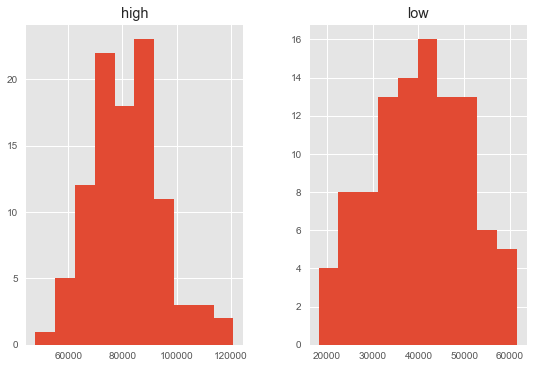

In [96]:
df[["low","high"]].hist();
